In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

Data Preparation

Load dataset

In [2]:
ds, ds_info = tfds.load("binary_alpha_digits", split="train",
                        as_supervised=True, shuffle_files=True,
                        with_info=True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1404 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/binary_alpha_digits/1.0.0.incomplete2C5MCS/binary_alpha_digits-train.tfrecord*…

Dataset binary_alpha_digits downloaded and prepared to ~/tensorflow_datasets/binary_alpha_digits/1.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='binary_alpha_digits',
    full_name='binary_alpha_digits/1.0.0',
    description="""
    Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples of each class.
    """,
    homepage='https://cs.nyu.edu/~roweis/data/',
    data_path='~/tensorflow_datasets/binary_alpha_digits/1.0.0',
    file_format=tfrecord,
    download_size=519.83 KiB,
    dataset_size=233.58 KiB,
    features=FeaturesDict({
        'image': Image(shape=(20, 16, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=36),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=1404, num_shards=1>,
    },
    citation="""
    """,
)

There is a huge bias in the current dataset, so shuffling needs to be done to prevent underfitting.



In [3]:
test_size = 0.2

ds_size = ds_info.splits["train"].num_examples
ds = ds.shuffle(buffer_size=ds_size)
num_train_samples = int(ds_size * (1 - test_size))

ds_train = ds.take(num_train_samples)
ds_test = ds.skip(num_train_samples)

Pixel in range: 0 - 1
Label: 23


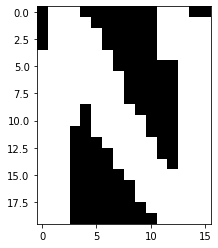

In [4]:
for sample in ds_train.take(1):
  X_sample, y_sample = map(lambda x : x.numpy(), sample)

print("Pixel in range:", X_sample.min(), '-', X_sample.max())
print("Label:", y_sample)
plt.imshow(X_sample.squeeze(), cmap="gray");

Batchify dataset

In [5]:
num_classes = 10 + 26
input_shape = next(iter(ds_train))[0].shape
print("Input shape:", input_shape)

Input shape: (20, 16, 1)


In [6]:
BATCH_SIZE = 128
ds_train = ds_train.batch(BATCH_SIZE).shuffle(num_train_samples)
ds_test = ds_test.batch(BATCH_SIZE).shuffle(ds_size - num_train_samples)

print(ds_train, ds_test, sep="\n")

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 20, 16, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<ShuffleDataset element_spec=(TensorSpec(shape=(None, 20, 16, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Model Architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
     

model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 36)                11556     
                                                                 
Total params: 11,556
Trainable params: 11,556
Non-trainable params: 0
_________________________________________________________________


Training


In [8]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = model.fit(ds_train, epochs=100, validation_data=ds_test)
 

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 3.6547 - acc: 0.0427 - val_loss: 3.2728 - val_acc: 0.1068
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 3.0811 - acc: 0.1834 - val_loss: 2.8504 - val_acc: 0.2776
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 2.7607 - acc: 0.3161 - val_loss: 2.5697 - val_acc: 0.3915
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 2.5106 - acc: 0.3811 - val_loss: 2.3680 - val_acc: 0.4199
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 2.2715 - acc: 0.4675 - val_loss: 2.1758 - val_acc: 0.4769
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 2.0829 - acc: 0.5459 - val_loss: 2.0339 - val_acc: 0.5267
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.9037 - acc: 0.5922 - val_loss: 1.8506 - val_acc: 0.6050
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1.7706 - acc: 0.6180 - va